In [18]:
import urllib.request
import os
import shutil
import gzip
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
import random
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, Binarizer
from sklearn.impute import SimpleImputer

from imgaug import augmenters as iaa


## Zapoznanie się z zestawami danych


### MNIST

http://yann.lecun.com/exdb/mnist/


MNIST (Modified National Institute of Standards and Technology database) - duży zbiór ręcznie zapisanych cyfr. Zawiera znormalizowane obrazki (28x28 px, anti-alliasing). 
Posiada 60'000 obrazów treningowych i 10'000 testowych.


Musimy zacząć od pobrania i zdekowania danych. Można zrobic to np. na piechotę:

In [10]:
mnist_prefix = "./mnist"
if os.path.isdir(mnist_prefix):
    shutil.rmtree(mnist_prefix)
os.mkdir(mnist_prefix)
base_url = "http://yann.lecun.com/exdb/mnist/"
datasets = ["train-labels-idx1-ubyte.gz", "train-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz", "t10k-images-idx3-ubyte.gz"]

In [11]:
def fetch_gz(base_url, name):
    path = "{}/{}".format(mnist_prefix, name)
    urllib.request.urlretrieve("{}{}".format(base_url, name), path)
    data_file = gzip.open(path, "rb")
    data = data_file.read()
    data_file.close()
    return data

In [12]:
def decode_mnist(data):
    magic_number = int.from_bytes(data[0:4], byteorder='big')
    if magic_number == 2051:
        number_of_images = int.from_bytes(data[4:8], byteorder='big')
        rows = int.from_bytes(data[8:12], byteorder='big')
        columns = int.from_bytes(data[12:16], byteorder='big')
        print("File contains {} images {}x{}".format(number_of_images, rows, columns))
        pixels = [int(b) for b in data[16:]]
        return np.array(pixels).reshape((number_of_images, rows, columns))
    elif magic_number == 2049:
        number_of_labels = int.from_bytes(data[4:8], byteorder='big')
        print("File contain {} labels".format(number_of_labels))
        return [int(b) for b in data[8:]]

In [13]:
(train_labels, train_images, test_labels, test_images) = [decode_mnist(fetch_gz(base_url, ds)) for ds in datasets]

HTTPError: HTTP Error 403: Forbidden

In [ ]:
plt.imshow(train_images[0])

In [ ]:
train_labels[0]

Lub w bardziej cywilizowany sposób używając gotowych funkcji bibliotek i pobierając dane np. z openml (https://www.openml.org/search?type=data):

In [15]:
mnist = fetch_openml("mnist_784")

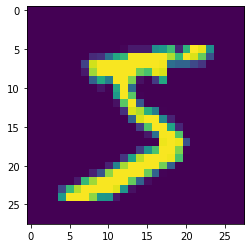

In [16]:
plt.imshow(np.array(mnist.data[0]).reshape(28,28))

### Fashion-MNIST

Fashion-MNIST

Zbiór analogiczny do MNIST, zawiera obrazy przedstawiające elementy odzieży. 70'000 obrazów 28x28 px w skali szarości. Wskazywany jako następca MNIST ( MNIST jest uznawany za zbyt prosty, zbyt często używany, FMNIST lepiej oddaje współczesne problemy Computer Vision).


https://github.com/zalandoresearch/fashion-mnist

In [ ]:
fmnist = fetch_openml("Fashion-MNIST")

In [ ]:
print(fmnist.DESCR)

plt.imshow(np.array(fmnist.data[10]).reshape(28,28))
print('Category:', fmnist.target[10])

### CIFAR-10
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
cifar10 = fetch_openml("CIFAR_10")

In [ ]:
print(cifar10.DESCR)

single_img_reshaped = np.transpose(np.array(cifar10.data[623]).reshape(3,32,32).astype(int) , (1,2,0))
plt.imshow(single_img_reshaped)

### SmallNorb

https://cs.nyu.edu/~ylclab/data/norb-v1.0-small/

### TNG

https://github.com/RMHogervorst/TNG

In [58]:
TNG_prefix = './TNG'
TNG_name = 'ng20.csv'
TNG_path = '{}/{}'.format(TNG_prefix, TNG_name)

In [85]:
TNG = pd.read_csv(TNG_path, header=None)
TNG

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,12.235819,0.000000,0.0,26.554754,0.000000,0.000000,0.000000,0.0,3.0
1,0.000000,6.462056,5.265274,0.0,4.559959,0.000000,0.0,0.000000,2.119816,0.000000,...,7.248282,0.000000,2.529904,0.0,0.000000,4.073248,0.000000,1.084394,0.0,9.0
2,17.636751,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.039917,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.700282,0.000000,0.0,16.0
4,0.000000,0.000000,0.000000,0.0,2.074241,0.000000,0.0,0.648221,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.667010,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5649,0.000000,0.000000,0.248722,0.0,0.000000,3.898138,0.0,2.554687,0.000000,4.410306,...,0.000000,0.000000,0.000000,0.0,0.000000,0.785907,0.000000,0.000000,0.0,12.0
5650,0.000000,0.000000,0.000000,0.0,0.320675,0.000000,0.0,3.230011,0.000000,0.000000,...,0.000000,1.078652,0.000000,0.0,2.671853,0.000000,0.113560,0.000000,0.0,8.0
5651,0.000000,0.000000,0.000000,0.0,0.000000,0.860070,0.0,1.224586,0.000000,0.457255,...,0.000000,0.000000,0.000000,0.0,0.303810,0.000000,0.000000,0.000000,0.0,4.0
5652,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,8.226898,0.000000,0.0,5.754258,0.000000,0.000000,0.000000,0.0,6.0


### Communities and Crime Unnormalized

In [60]:
cc_prefix = "./communities_and_crimes"
cc_name = "crimedata.csv"
cc_path = "{}/{}".format(cc_prefix, cc_name)

In [61]:
crimes = pd.read_csv(cc_path)

## Procedury normalizujące dane i wybierające dane ze zbioru danych

TODO: opis procedur

### Wybieranie danych

Najprostszy sposób na zmniejszenie rozmiaru datasetu - wzięcie n początkowych elementów:


In [ ]:
fmnist_zipped = zip(fmnist.data, fmnist.target)
fmnist_reduced_list = list(fmnist_zipped)[:1000]

fmnist_reduced_data, fmnist_reduced_target = zip(*(fmnist_reduced_list))
print((list(fmnist_reduced_target)[0:10]))


Wzięcie _n_ losowych elementów z datasetu (bez modyfikacji kolejności w źródłowym datasecie):

In [ ]:
fmnist_random_sample = random.sample(fmnist_reduced_list, 100)
fmnist_reduced_data, fmnist_reduced_target = zip(*(fmnist_random_sample))
print((list(fmnist_reduced_target)[0:10]))

Podział danych na zbiór testowy oraz treningowy przy pomocy _sklearn_ :

In [ ]:
X = fmnist.data
y = fmnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train: ', len(X_train), ' y_train: ', len(y_train))
print('X_test: ', len(X_test), ' y_test: ', len(y_test))

### Normalizacja danych

TODO: Opisać bardziej poszczególne metody normalizacji i standaryzacji, dodać przykład ze zdjęciem

Normalizację danych wykonamy na danych UCI "Communities and Crime Unnormalized", dotyczących przestępczości w USA _(M=2215, N=143)_ .

https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
https://www.kaggle.com/kkanda/communities%20and%20crime%20unnormalized%20data%20set/data

In [62]:
cc_df = crimes.set_index(['communityname', 'state', 'countyCode', 'communityCode']).replace('?', np.NaN)
cc_df

,,,,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
communityname,state,countyCode,communityCode,,,,,,,,,,,,,,,,,,,,,
BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,...,225,1301.78,716,4142.56,47,271.93,NaN,NaN,306.64,NaN
Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,...,91,728.93,1060,8490.87,91,728.93,5,40.05,NaN,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2


#### Uzupełnianie brakujących danych

In [ ]:
imp=SimpleImputer(missing_values=np.NaN, strategy='mean')

cc_df_filled = pd.DataFrame(imp.fit_transform(cc_df.values), index=cc_df.index, columns=cc_df.columns)
cc_df_filled

#### Skalowanie Min-Max

In [ ]:
minmax = MinMaxScaler(feature_range=(0,1))
minmax_df = minmax.fit_transform(cc_df_filled)
df_scaled = pd.DataFrame(minmax_df, columns=cc_df_filled.columns, index=cc_df_filled.index)
df_scaled

#### Standaryzacja

In [ ]:
standscaler = StandardScaler()
standscaler_df = standscaler.fit_transform(cc_df_filled)
st_df = pd.DataFrame(standscaler_df, columns=cc_df_filled.columns, index=cc_df_filled.index)
st_df

#### Normalizacja

In [ ]:
norm = Normalizer(norm='l2')
norm_df = norm.fit_transform(cc_df_filled)
norm_df = pd.DataFrame(norm_df, columns=cc_df_filled.columns, index=cc_df_filled.index)
norm_df

In [ ]:
norm = Normalizer(norm='l1')
norm_df = norm.fit_transform(cc_df_filled)
norm_df = pd.DataFrame(norm_df, columns=cc_df_filled.columns, index=cc_df_filled.index)
norm_df

#### Binaryzacja

In [ ]:
binarizer = Binarizer(threshold=10.0).fit_transform(cc_df_filled)
binary_df = pd.DataFrame(binarizer, columns=cc_df_filled.columns, index=cc_df_filled.index)
binary_df

## Algorytm k-NN

Algorytm kNN (k najbliższych sąsiadów) oblicza dystans każdy-do-każdego w przestrzeni euklidesowej, po czym wybiera k najbliższych obiektów do rozważanego. Te k najbliższych sąsiadów uznaje się, że są najbardziej zbliżone cechami. Dla każdego punktu w przestrzeni bierzemy k najbliższych sąsiadów i przypisujemy go do klasy z etykietą, którą ma większość okolicznych punktów danych (tzw. majority voting).

#### Przykładowe wyszukanie najbliższego sąsiada

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

#n_neighbors - k z kNN
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(distances)
print(indices)

#### Przykładowe wykorzystanie

Poeksperymentuj z n_neighbors i zobacz, jak zmienia się przydział danego obszaru do klas.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 10

# importujemy przykładowy zbiór danych
iris = datasets.load_iris()

# bierzemy tylko 2 pierwsze wymiary z danych (żeby łatwo wizualizować)
X = iris.data[:, :2]
y = iris.target

h = .02  # jak duży rozmiar obszarów rozważanych

# mapy kolorków do wyświetlania
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # Używamy klasyfikatora i fitujemy dane
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Rezultat dodajemy do mapy
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Rysujemy też punkty danych
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### FAISS

Biblioteka do szybkiego liczenia, wykorzystująca CUDA, znacznie przyśpiesza obliczenia dzięki użyciu GPU.

https://github.com/facebookresearch/faiss

#### Porównanie ilości przetwarzanych danych na sekundę
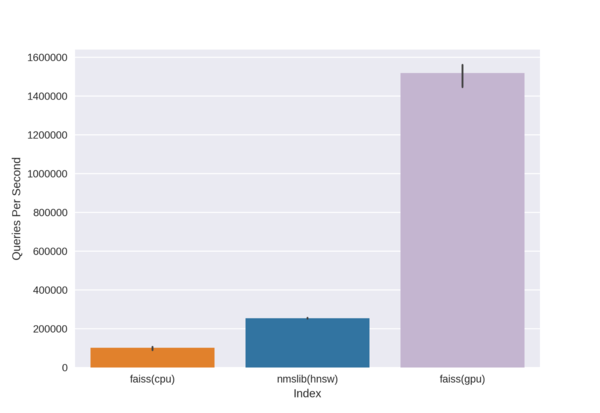

#### Dla odważnych (z Nvidią i CUDA) Instalacja i wykorzystanie w praktyce

https://github.com/facebookresearch/faiss/blob/master/INSTALL.md

In [ ]:
import faiss

dimension = 128    # dimensions of each vector                         
n = 200    # number of vectors                   
np.random.seed(1)             
db_vectors = np.random.random((n, dimension)).astype('float32')

nlist = 5  # number of clusters
quantiser = faiss.IndexFlatL2(dimension)  
index = faiss.IndexIVFFlat(quantiser, dimension, nlist, faiss.METRIC_L2)

index.train(db_vectors)  # train on the database vectors
index.add(db_vectors)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)   # 200

nprobe = 2  # find 2 most similar clusters
n_query = 10  
k = 3  # return 3 nearest neighbours
np.random.seed(0)   
query_vectors = np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(query_vectors, k)

## Miary jakości klasyfikatora

- cross validation (scikit learn)
- leave-one-out

przykładowy dataset:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [ ]:
print("TODO: czy tutaj dać jakieś polecenia?")

## Zmiana miary jakości w zależności od zmniejszenia zbioru uczącego 
(stosunek dane uczące -> testowe)

In [ ]:
print("TODO: przykładowe wywołania poleceń z opisem argumentów + zadanie czy można poprawić jakość")

## Regularyzacja zbioru z małą ilością danych przez augmentację

Augumentacja (rozszerzanie) polega na dodawaniu do zbioru nowych elementów poprzez zastosowanie różnorodnych transformacji dla elementów już istniejących. Jest ona powszechnie wykorzystywana w uczeniu maszynowym, ponieważ generowanie dużych zbiorów danych jest często trudne, a czasem nawet i niemożliwe. \
\
W zależności od zbioru danych można stosować różne operację je modyfikujące np. dodawanie szumów, interpolacja lub ekstrapolacja.

TODO: pokazać jak zmieniają się miary jakości przy różnym stopniu nasilenia augmentacji (np interpolowanie zbioru punktami między już istniejącymi)

In [86]:
def augment(dataset):
    return dataset

In [87]:
y = np.array(TNG[128])
X = np.array(TNG[range(0,128)])

In [98]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

0.812555260831123

In [100]:
def check_TNG_accuracy(X_train, X_test, y_train, y_test):
    clf = neighbors.KNeighborsClassifier(10)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    return accuracy_score(y_test, y_predicted)

In [101]:
print("Non augmented set accuracy: {}".format(check_TNG_accuracy(X_train, X_test, y_train, y_test)))
print("Augmented set accuracy: {}".format(check_TNG_accuracy(X_train, X_test, y_train, y_test)))

Non augmented set accuracy: 0.812555260831123
Augmented set accuracy: 0.812555260831123


## Procedury augmentacyjne z imgaug

Biblioteka imgaug służy do rozszerzenia zbiorów danych złożonych z obrazków. Pozwala ona wykonać wiele operacji (przez np. przycięcie obrazków, nałożenie szumów, zmianę kontrastu, zmianę perspektywy) dzięki czemu otrzymujemy większy zbiór danych. 

https://github.com/aleju/imgaug

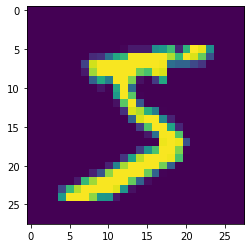

In [20]:
image = np.array(mnist.data[0]).reshape(28,28)
plt.imshow(image)

### Przycięcie obrazka

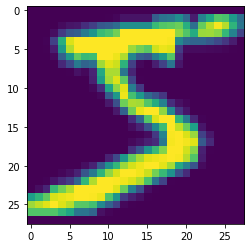

In [24]:
crop = iaa.Crop(px=(1, 5)) # przytnij od 1 do 5 pixeli z każdej strony
cropped = crop(images=[image])

plt.imshow(cropped[0])

### Rozmycie obrazka

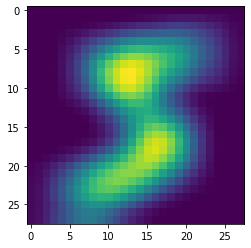

In [26]:
blur = iaa.GaussianBlur(sigma=(2.0, 3.0))
blurred = blur(images=[image])

plt.imshow(blurred[0])

### Obrót obrazka

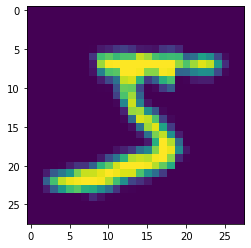

In [36]:
rotate = iaa.Affine(rotate=(-15, 15))
rotated = rotate(images=[image])

plt.imshow(rotated[0])

### Ciąg operacji na zbiorze

In [50]:
seq = iaa.Sequential([
    iaa.Sometimes(0.7, iaa.GaussianBlur(sigma=(2.0, 3.0))),
    iaa.Affine(rotate=(-15, 15))
])

#tutaj polecam zastosować lepsze wybieranie danych
images = [np.array(i).reshape(28,28) for i in mnist.data[:100]]
augmented_images = seq(images=images)

print(len(augmented_images))

100


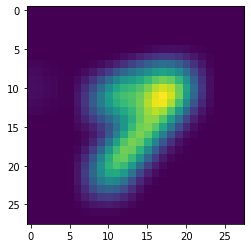

In [55]:
# Spróbuj wybrać losowy index z przedziało 0-100
plt.imshow(augmented_images[29])

## Zadanie

Przetestuj klasyfikator kNN na zbiorach MNIST, FMNIST rozszerzając zbiór przy pomocy imgaug oraz tworząc obrazki dodatkowe poprzez zaburzenie danych (np. dla x% pikseli losować liczbę 0,1 (MNIST), i odpowiednią – stopień szarości - dla zbioru FMNIST). \
Porównaj jakości klasyfikatorów dla zmodyfikowanych danych.